In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecharts.charts import Bar, Line
from pyecharts import options as opts 
from pyecharts.faker import Faker
import jieba
from imageio import imread  # 处理图像的函数
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator


plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False

In [10]:
com_df = pd.read_csv('《春潮》影评信息表.csv')
com_df.head()

用户  评分 推荐等级             评论时间  \
0       影志   4   推荐  2019/6/18 18:42   
1     二月鸟语   3   还行   2019/7/23 1:19   
2      木卫二   3   还行  2019/6/23 21:25   
3     桃桃林林   4   推荐  2019/6/18 19:13   
4  silviaw   5   力荐  2019/6/18 17:48   

                                                评论内容  
0  最有趣的就是小女儿的那些东北台词了：姥姥你这么说你丈夫合适吗、周叔叔你这马屁拍的都可以做教科...  
1  3.5/10，看起来是给郝蕾定做的，实则金燕玲的形象才是塑造和表演最好的。和那些只管灌输情绪...  
2  看得好累😫。导演大致借鉴了《一一》金燕玲的几场掏心戏（因为沟通已经不可能，哪怕结尾安排郝蕾来...  
3  7分。有尬的地方，也有很妙的地方，但整体还是喜欢的。讲母女关系，却又远不仅是讲母女关系，这就...  
4                                      纪念第一次在电影院看郝蕾。

In [24]:
# 评分汇总
com_score = com_df.groupby('评分')['用户'].count().reset_index()
com_score.columns = ['评分', '用户数']

score_bar = (
    Bar()
    .add_xaxis(com_score['评分'])
    .add_yaxis("用户数", com_score['用户数'])
    .set_global_opts(title_opts=opts.TitleOpts(title='用户评论分数统计图'))
    .render("score_stats.html")
)

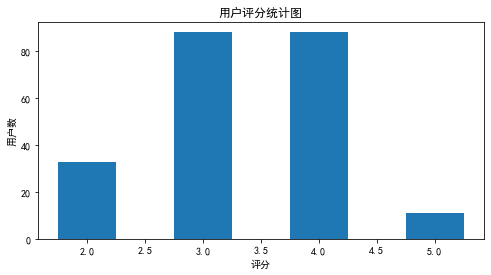

In [34]:
plt.figure(figsize=(8, 4))
plt.bar(com_score['评分'], com_score['用户数'], width=0.5)
plt.xlabel('评分')
plt.ylabel('用户数')
plt.title('用户评分统计图')
plt.show()

(-0.5, 532.5, 299.5, -0.5)

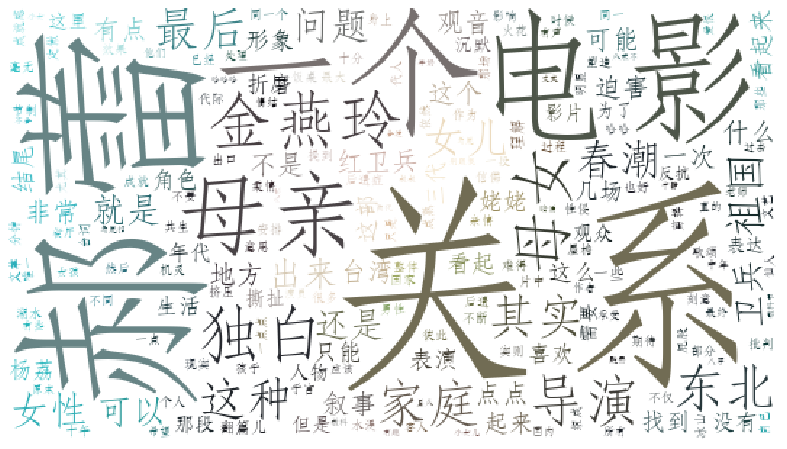

In [52]:
comments_str = ' '.join(com_df['评论内容'])
# 将评论内容存储到本地
comments_txt = open('电影评论内容.txt', 'w', encoding='utf-8')
comments_txt.write(comments_str)

words_list = []
word_generator = jieba.cut_for_search(comments_str)
for word in word_generator:
    words_list.append(word)
words_list = [k for k in words_list if len(k) > 1]
back_color = imread('image2.jpg')    # 解析图片
wc = WordCloud(background_color='white',     # 背景颜色
              max_words=200,      # 最大词数
              mask=back_color,    # 以该参数值作图绘制词云，这个参数不为空时，weight和height会被忽略
              max_font_size=300,  # 显示字体的最大值
              font_path="C:/Windows/Fonts/STFANGSO.ttf",    # 解决显示字型乱码的问题，可到C:/Windows/Fonts/目录更换字体
              random_state=42,)    # 为每个词返回一个PIL颜色
com_count = Counter(words_list)
wc.generate_from_frequencies(com_count)    
image_colors = ImageColorGenerator(back_color)    # 基于彩色图像生成相应的彩色

plt.figure(figsize=(40, 8))
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
